# Practice 1

In [56]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

np.random.seed(42)

In [57]:
n_sample    = 10
n_set       = 20

x = np.linspace(1, 10, n_sample, endpoint=True)
x_set = np.tile(x[np.newaxis, :], (n_set, 1))

In [58]:
def linear(x, a, b):
    return a * x + b 

In [59]:
m = 3
k = 1
mean    = 0
sigma_0 = 3 * np.ones((n_set, n_sample))

noise       = np.random.normal(mean, sigma_0, x_set.shape)
y_true      = linear(x_set, m, k)
y_original  = y_true + noise

In [60]:
# plt.figure(figsize=(10, 6))
# plt.errorbar(x_set.flatten(), y_original.flatten(), yerr=sigma_0.flatten(), fmt='o', color='C0', alpha=0.5, label='Data')
# plt.plot(x, y_true[0, :], 'r-', label='True model', lw=2)

# plt.xlabel('x')
# plt.ylabel('y')

# plt.title('Original data with error bars')

# plt.savefig('./fig/output_1_1.pdf', transparent=True)
# plt.legend(loc='upper left')
# plt.show()

In [61]:
sigma_0_adjust = sigma_0.copy()
sigma_0_adjust[:, 3:7] = 10

y_adjust = linear(x_set, m, k) + np.random.normal(mean, sigma_0_adjust, x_set.shape)

In [62]:
# plt.figure(figsize=(10, 6))
# plt.errorbar(x_set.flatten(), y_adjust.flatten(), yerr=sigma_0_adjust.flatten(), 
#              fmt='o', color='C0', alpha=0.5, label='Data')
# plt.plot(x, y_true[0, :], 'r-', label='True model', lw=2)

# plt.xlabel('x')
# plt.ylabel('y')

# plt.title('Adjusted data with error bars')

# plt.legend(loc='upper left')
# plt.savefig('./fig/output_1_2.pdf', transparent=True)
# plt.show()

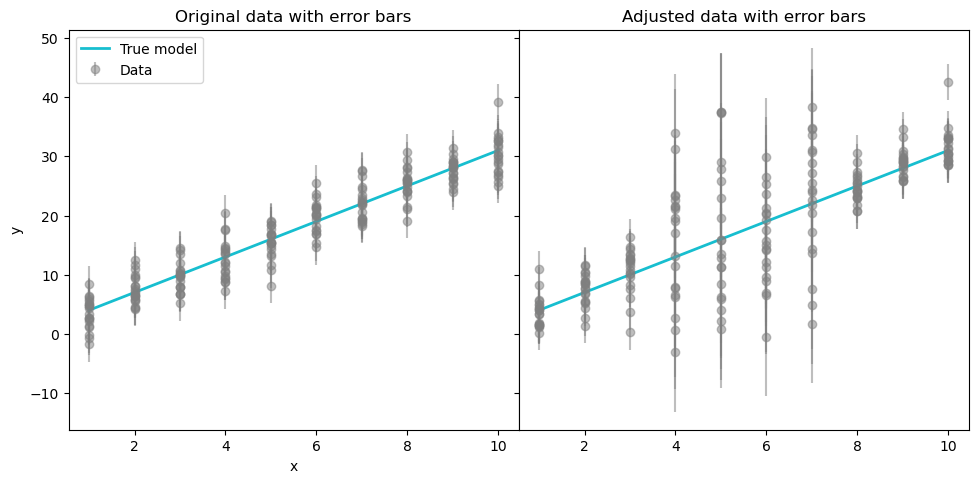

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
plt.subplots_adjust(left=0.07, right=0.97, top=0.9, bottom=0.1, hspace=0, wspace=0)

ax[0].errorbar(x_set.flatten(), y_original.flatten(), yerr=sigma_0.flatten(), 
               fmt='o', color='C7', alpha=0.5, label='Data')
ax[0].plot(x, y_true[0, :], color='C9', label='True model', lw=2)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend(loc='upper left')
ax[0].set_title('Original data with error bars')

ax[1].errorbar(x_set.flatten(), y_adjust.flatten(), yerr=sigma_0_adjust.flatten(), 
             fmt='o', color='C7', alpha=0.5, label='Data')
ax[1].plot(x, y_true[0, :], color='C9', label='True model', lw=2)
ax[1].set_title('Adjusted data with error bars')

plt.savefig('./fig/output_1_1.pdf', transparent=True)
plt.show()

In [64]:
mean_y_adjust = np.mean(y_adjust, axis=0)
sigma_y_adjust = np.std(y_adjust, axis=0)
print(f'y_true: {y_true[0, :]}')
print(f"mean: {mean_y_adjust}")
print('==========================')
print(f'std_true: {sigma_0_adjust[0, :]}')
print(f"std: {sigma_y_adjust}")

y_true: [ 4.  7. 10. 13. 16. 19. 22. 25. 28. 31.]
mean: [ 3.7317675   7.51018254 10.62186273 15.3878198  17.27131913 15.90692865
 22.85163387 24.72823459 28.93321474 31.62547308]
std_true: [ 3.  3.  3. 10. 10. 10. 10.  3.  3.  3.]
std: [ 2.57154411  2.70636339  3.81006406  9.85004994 11.60101412  7.44949283
 10.06736762  2.48776362  2.23224275  3.11042094]


In [65]:
parms_chisq, cov_chisq = curve_fit(linear, x_set.flatten(), y_adjust.flatten(), 
                                   sigma=sigma_0_adjust.flatten(), absolute_sigma=True)
parms_uncertainty_chisq = np.sqrt(np.diag(cov_chisq))
parms_ls, cov_ls = curve_fit(linear, x_set.flatten(), y_adjust.flatten())
parms_uncertainty_ls = np.sqrt(np.diag(cov_ls))

In [66]:
chi2_ls = np.sum(((mean_y_adjust - linear(x, *parms_chisq)) / sigma_y_adjust)**2)
chi2_chi = np.sum(((mean_y_adjust - linear(x, *parms_ls)) / sigma_y_adjust)**2)

In [67]:
print("Chi-square fitting")
print(f"m: {parms_chisq[0]} ± {parms_uncertainty_chisq[0]}")
print(f"k: {parms_chisq[1]} ± {parms_uncertainty_chisq[1]}")
print(f'chisq: {chi2_chi}')

print('===========================================')
print("Least-square fitting")
print(f"m: {parms_ls[0]} ± {parms_uncertainty_ls[0]}")
print(f"k: {parms_ls[1]} ± {parms_uncertainty_ls[1]}")
print(f'chisq: {chi2_ls}')


Chi-square fitting
m: 3.036747091742827 ± 0.07597980536937424
k: 1.156118712173278 ± 0.4953643977053076
chisq: 0.48853880032044295
Least-square fitting
m: 2.985233255792696 ± 0.16710284738728395
k: 1.438060752192655 ± 1.0368459071172862
chisq: 0.44692727280046485


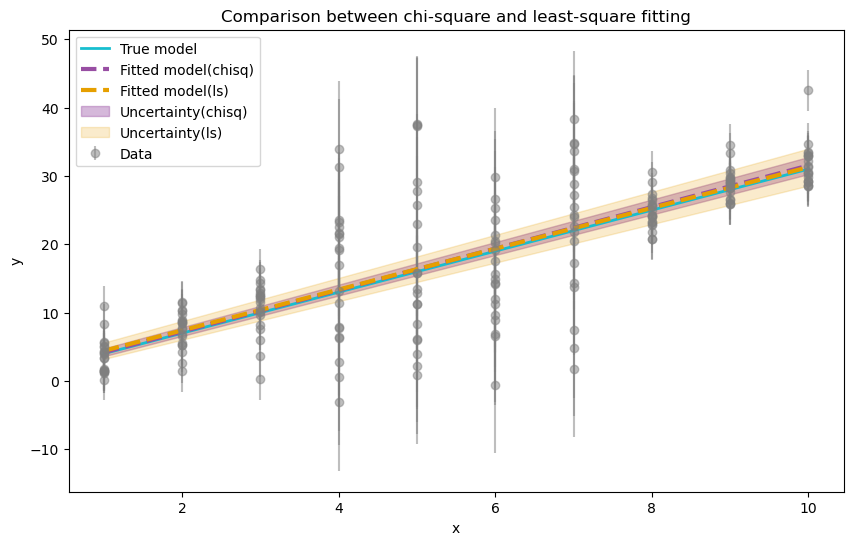

In [68]:
# Calculate the upper and lower bounds of the model
y_upper = linear(x, parms_chisq[0] + parms_uncertainty_chisq[0], parms_chisq[1] + parms_uncertainty_chisq[1])
y_lower = linear(x, parms_chisq[0] - parms_uncertainty_chisq[0], parms_chisq[1] - parms_uncertainty_chisq[1])

y_upper_ls = linear(x, parms_ls[0] + parms_uncertainty_ls[0], parms_ls[1] + parms_uncertainty_ls[1])
y_lower_ls = linear(x, parms_ls[0] - parms_uncertainty_ls[0], parms_ls[1] - parms_uncertainty_ls[1])
# Plot the area of uncertainties
plt.figure(figsize=(10, 6))


# ['#984ea3', '#e69f00']
plt.errorbar(x_set.flatten(), y_adjust.flatten(), yerr=sigma_0_adjust.flatten(), 
             fmt='o', color='C7', alpha=0.5, label='Data')

# plt.plot(x, y_true[0, :], 'r:', label='True model', lw=2)

# Plot the fitted model
plt.plot(x, y_true[0, :], color='C9', linestyle='-', label='True model', lw=2)
plt.plot(x, linear(x, *parms_chisq), linestyle='--', color='#984ea3', label='Fitted model(chisq)', lw=3)
plt.plot(x, linear(x, *parms_ls), linestyle='--', color='#e69f00', label='Fitted model(ls)', lw=3)

plt.fill_between(x, y_lower, y_upper, color='#984ea3', alpha=0.4, label='Uncertainty(chisq)')
plt.fill_between(x, y_lower_ls, y_upper_ls, color='#e69f00', alpha=0.2, label='Uncertainty(ls)')


plt.xlabel('x')
plt.ylabel('y')

plt.title('Comparison between chi-square and least-square fitting')

# Add legend and show the plot
plt.legend(loc='upper left')
plt.savefig('./fig/output_1_2.pdf', transparent=True)
plt.show()